# HIGH VOLTAGE BATTERY PACK INDIVIDUAL MODULES DATA
## Lahore driven vehicles
Data collected from HV battery packs from Toyota Prius and Toyota Aqua (Prius c) that were driven in Lahore from the years 2011 to 2018 
The data contains the discharge times of individual modules of the HV battery pack 

In [71]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
#importing data csv file
s = pd.read_csv("batterydata.csv")
s.head()

,s.no,modules,2011 prius,2012 prius,2013 prius,2014 prius,2015 prius,2016 prius,2017 prius,2011 aqua,2012 aqua,2013 aqua,2014 aqua,2015 aqua,2016 aqua,2017 aqua,2018 aqua
0,1,1,27.0,29.0,30.0,30.0,32.0,36.0,40.0,27.0,27.0,28.0,29.0,29.0,32.0,36.0,39.0
1,2,2,27.0,28.0,29.0,29.0,30.0,34.0,38.0,26.0,27.0,27.0,28.0,28.0,30.0,33.0,36.0
2,3,3,24.0,28.0,28.0,28.0,29.0,30.0,35.0,NaN,26.0,27.0,27.0,27.0,29.0,31.0,33.0
3,4,4,25.0,20.0,20.0,21.0,26.0,28.0,30.0,22.0,22.0,24.0,24.0,26.0,28.0,30.0,32.0
4,5,5,17.0,20.0,20.0,20.0,24.0,NaN,29.0,17.0,20.0,23.0,24.0,NaN,25.0,28.0,30.0


In [73]:
s.shape #determining size and shape of the data 

(28, 17)

In [74]:
s.describe()

,s.no,modules,2011 prius,2012 prius,2013 prius,2014 prius,2015 prius,2016 prius,2017 prius,2011 aqua,2012 aqua,2013 aqua,2014 aqua,2015 aqua,2016 aqua,2017 aqua,2018 aqua
count,28.000000,28.000000,23.000000,27.000000,26.000000,25.00000,26.000000,24.000000,23.000000,16.000000,18.000000,19.000000,19.000000,15.000000,18.000000,19.000000,19.000000
mean,14.500000,14.500000,20.217391,21.074074,21.076923,22.60000,22.653846,25.333333,28.521739,20.875000,21.777778,22.315789,22.894737,24.200000,25.166667,27.052632,30.368421
std,8.225975,8.225975,6.639801,6.498082,7.013832,6.69577,7.205233,6.951175,7.902069,5.998611,5.374838,5.344287,5.829949,6.537802,6.099662,6.948011,7.440210
min,1.000000,1.000000,10.000000,11.000000,10.000000,11.00000,10.000000,13.000000,15.000000,10.000000,10.000000,12.000000,12.000000,12.000000,10.000000,15.000000,18.000000
25%,7.750000,7.750000,14.500000,15.500000,15.000000,17.00000,17.250000,18.750000,25.000000,17.750000,18.500000,19.000000,19.500000,21.500000,21.250000,22.500000,25.000000
50%,14.500000,14.500000,18.000000,20.000000,20.000000,22.00000,23.500000,26.500000,29.000000,21.500000,22.000000,23.000000,24.000000,27.000000,27.500000,29.000000,30.000000
75%,21.250000,21.250000,26.000000,27.500000,28.000000,28.00000,28.750000,30.250000,35.000000,26.000000,26.750000,27.000000,28.000000,29.000000,29.750000,32.000000,35.500000
max,28.000000,28.000000,29.000000,31.000000,32.000000,34.00000,35.000000,36.000000,41.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,36.000000,43.000000


The data contained some missing values hence checking each column 

In [75]:
s.isnull().sum()

s.no           0
modules        0
2011 prius     5
2012 prius     1
2013 prius     2
2014 prius     3
2015 prius     2
2016 prius     4
2017 prius     5
2011 aqua     12
2012 aqua     10
2013 aqua      9
2014 aqua      9
2015 aqua     13
2016 aqua     10
2017 aqua      9
2018 aqua      9
dtype: int64

## Analyzing Prius Data 
Removing all the columns of Aqua since it only has 20 modules as opposed to prius in which the hv battery contains 28 modules hence the Aqua column contained 8 nan values so analyzing the Prius data separately

In [76]:
columns_to_drop = [col for col in s.columns if 'aqua' in col]
prius_data  = s.drop(columns=columns_to_drop)
prius_data.head()

,s.no,modules,2011 prius,2012 prius,2013 prius,2014 prius,2015 prius,2016 prius,2017 prius
0,1,1,27.0,29.0,30.0,30.0,32.0,36.0,40.0
1,2,2,27.0,28.0,29.0,29.0,30.0,34.0,38.0
2,3,3,24.0,28.0,28.0,28.0,29.0,30.0,35.0
3,4,4,25.0,20.0,20.0,21.0,26.0,28.0,30.0
4,5,5,17.0,20.0,20.0,20.0,24.0,NaN,29.0


In [77]:
prius_data.isnull().sum()

s.no          0
modules       0
2011 prius    5
2012 prius    1
2013 prius    2
2014 prius    3
2015 prius    2
2016 prius    4
2017 prius    5
dtype: int64

### Data Manipulation 
The data set contains some missing values, as the quantity of nan values is rather less hence using interpolation to fill up the data with identical to the values surrounding thevmissing data to minimize the chance of error and get normalized data to somewhat accurate results  

In [78]:
prius_data = prius_data.interpolate()
prius_data.head()

,s.no,modules,2011 prius,2012 prius,2013 prius,2014 prius,2015 prius,2016 prius,2017 prius
0,1,1,27.0,29.0,30.0,30.0,32.0,36.0,40.0
1,2,2,27.0,28.0,29.0,29.0,30.0,34.0,38.0
2,3,3,24.0,28.0,28.0,28.0,29.0,30.0,35.0
3,4,4,25.0,20.0,20.0,21.0,26.0,28.0,30.0
4,5,5,17.0,20.0,20.0,20.0,24.0,26.5,29.0


### Plotting the trend for Visualization of the data to gain insights 

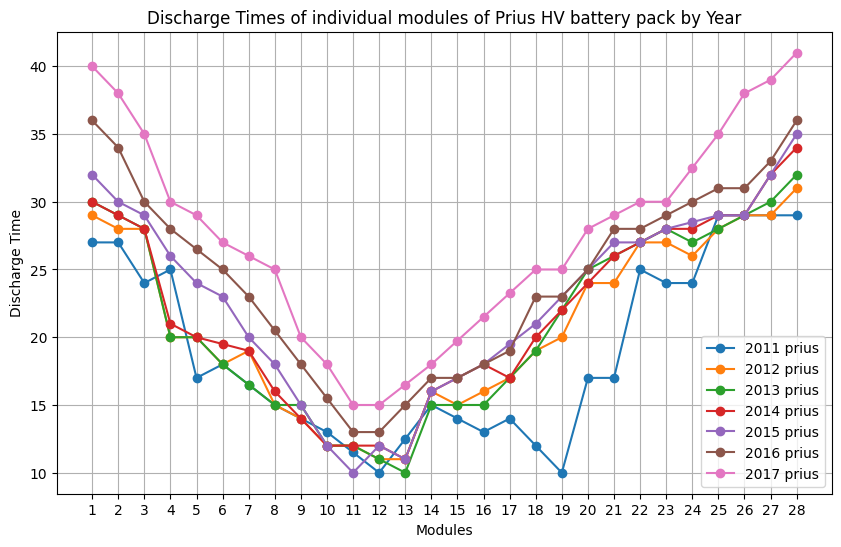

In [79]:
modules = prius_data['modules']
# Extract the columns to plot (excluding the modules column)
columns_to_plot = prius_data.columns[2:]
# Plot the line plots
plt.figure(figsize=(10, 6))
plt.plot(modules, prius_data[columns_to_plot], marker='o')
plt.xticks(prius_data['modules'])
plt.grid(True)
# Set labels and title
plt.xlabel('Modules')
plt.ylabel('Discharge Time')
plt.title('Discharge Times of individual modules of Prius HV battery pack by Year')
# Add a legend
plt.legend(columns_to_plot)
# Show the plot
plt.show()

### Insights 
The above plot depicts that the individual modules of the HV Battery Pack of the Toyota Prius show a very similar behaviour over the years 
- The modules placed in the middle of the HV Battery Pack have the lowest discharge times showing that they get the weakest irrespective of the year of manufacturing of the HV Battery Pack 
- The modules placed at the edges of the battery pack have a rather higher discharge time showing that the battery pack basically gets weaker from the middle but stays considerably strong from the edges 
- As the years increase it can be observed that the modules obtained from the edges of the battery are much more healthier as comapred to those of obtained from much older battery pack models 

## Analyzing Aqua (Prius C) Data 
Removing all the columns of Prius since it has 28 modules as opposed to Aqua in which the hv battery contains 20 modules hence the Prius column contained 8 extra values so analyzing the Aqua data separately

In [80]:
columns_to_drop = [col for col in s.columns if 'prius' in col]
Aqua_data  = s.drop(columns=columns_to_drop)
Aqua_data.head()

,s.no,modules,2011 aqua,2012 aqua,2013 aqua,2014 aqua,2015 aqua,2016 aqua,2017 aqua,2018 aqua
0,1,1,27.0,27.0,28.0,29.0,29.0,32.0,36.0,39.0
1,2,2,26.0,27.0,27.0,28.0,28.0,30.0,33.0,36.0
2,3,3,NaN,26.0,27.0,27.0,27.0,29.0,31.0,33.0
3,4,4,22.0,22.0,24.0,24.0,26.0,28.0,30.0,32.0
4,5,5,17.0,20.0,23.0,24.0,NaN,25.0,28.0,30.0


### Data Manipulation 
Removing the last 8 rows containing nan values since there are only 20 modules in the battery pack of Aqua as compared to 28 modules of the Toyota Prius 

In [81]:
Aqua_data = Aqua_data.drop(Aqua_data.index[-8:])
Aqua_data.tail()

,s.no,modules,2011 aqua,2012 aqua,2013 aqua,2014 aqua,2015 aqua,2016 aqua,2017 aqua,2018 aqua
15,16,16,24.0,24.0,25.0,25.0,NaN,29.0,29.0,35.0
16,17,17,26.0,26.0,26.0,28.0,29.0,29.0,31.0,33.0
17,18,18,26.0,27.0,27.0,28.0,30.0,30.0,34.0,39.0
18,19,19,27.0,27.0,28.0,30.0,30.0,31.0,35.0,41.0
19,20,20,27.0,28.0,29.0,30.0,31.0,31.0,35.0,43.0


Checking for missing values within the rows of Aqua Modules

In [82]:
Aqua_data.isnull().sum()

s.no         0
modules      0
2011 aqua    4
2012 aqua    2
2013 aqua    1
2014 aqua    1
2015 aqua    5
2016 aqua    2
2017 aqua    1
2018 aqua    1
dtype: int64

### Further cleaning the Data
The data set contains some missing values, as the quantity of nan values is rather less hence using interpolation to fill up the data with identical to the values surrounding thevmissing data to minimize the chance of error and get normalized data to somewhat accurate results

In [84]:
Aqua_data = Aqua_data.interpolate()
Aqua_data.head()

,s.no,modules,2011 aqua,2012 aqua,2013 aqua,2014 aqua,2015 aqua,2016 aqua,2017 aqua,2018 aqua
0,1,1,27.0,27.0,28.0,29.0,29.00,32.0,36.0,39.0
1,2,2,26.0,27.0,27.0,28.0,28.00,30.0,33.0,36.0
2,3,3,24.0,26.0,27.0,27.0,27.00,29.0,31.0,33.0
3,4,4,22.0,22.0,24.0,24.0,26.00,28.0,30.0,32.0
4,5,5,17.0,20.0,23.0,24.0,26.25,25.0,28.0,30.0


### Plotting the trend for Visualization of the data to gain insights 

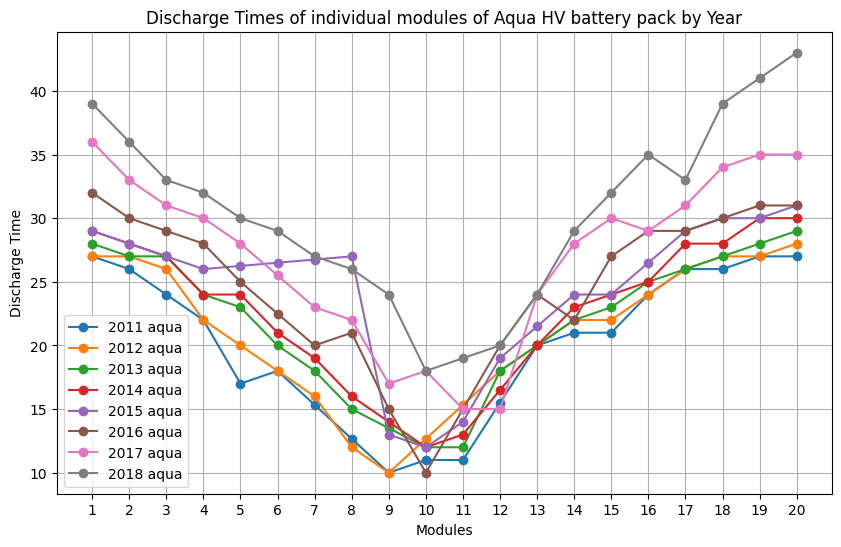

In [85]:
modules = Aqua_data['modules']
# Extract the columns to plot (excluding the modules column)
columns_to_plot = Aqua_data.columns[2:]
# Plot the line plots
plt.figure(figsize=(10, 6))
plt.plot(modules, Aqua_data[columns_to_plot], marker='o')
plt.xticks(Aqua_data['modules'])
plt.grid(True)
# Set labels and title
plt.xlabel('Modules')
plt.ylabel('Discharge Time')
plt.title('Discharge Times of individual modules of Aqua HV battery pack by Year')
# Add a legend
plt.legend(columns_to_plot)
# Show the plot
plt.show()

### Insights 
The above plot depicts that the individual modules of the HV Battery Pack of the Toyota Aqua (Prius C) show a very similar behaviour over the years and closely resembles the trend of Prius battery modules. 
- The modules placed in the middle of the HV Battery Pack have the lowest discharge times showing that they get the weakest irrespective of the year of manufacturing of the HV Battery Pack 
- The modules placed at the edges of the battery pack have a rather higher discharge time showing that the battery pack basically gets weaker from the middle but stays considerably strong from the edges 
- As the years increase it can be observed that the modules obtained from the edges of the battery are much more healthier as comapred to those of obtained from much older battery pack models 